### Problem Statement
The data scientists at Big Mart have collected sales data for one thousand five hundred and fifty-nine products across ten stores in different cities.Furthermore, certain attributes of each product and store have been defined.The aim is to build a predictive model and find the sales figures of each product at a particular store. Using this model, Big Mart will try to understand the properties of products and stores, which play a key role in increasing sales.

> Let's now try and understand what could affect the target variable "sales".
1. Time of the week
2. Time of the day
3. Time of the year
4. Store size and location
5. The item in question

In [1]:
# Import the required Liabraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the Dataset in Pandas Dataframe
train = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Simplilearn\Machine Learning\dataset\Big_Mart_Train.csv")
test = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Simplilearn\Machine Learning\dataset\Big_Mart_Test.csv")

In [3]:
# Check number of rows and columns in train Dataset
train.shape

(8523, 12)

In [4]:
# Print the name of Columns in train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
# Check number of rows and columns in test Dataset
test.shape

(5681, 11)

In [6]:
# Print the name of Columns in test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
# Combine train and test dataset ito one file to perform EDA
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat((train,test), ignore_index=True)

In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [9]:
data.shape

(14204, 13)

In [10]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [11]:
# Describe function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
# Checking for missing values.
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

__The Column Item_Weight has 2439 missing values and Outlen_size around 4016 missing values.__\
__Item_Outlet_Sales has 5681 missing values, which we will predict using this model.__

In [13]:
# Print the unique values in the Item_Fat_Content Column,where there are only two unique types of fat content in items.
# Low fat & Regular
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
# Print the unique values in the Outlet_Establishment_Year Column, Where the data ranges from 1985 to 2009
data.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [15]:
# Print the unique values in the Outlet_Size Column
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
# Calculate the Age of Outlet from its Establishment year
data["Outlet_Age"] = 2022 - data.Outlet_Establishment_Year
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [17]:
# Print the count value of Item Fat Content Column
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

__We Can See that Low Fat Products are Most Abundunt.__

In [18]:
# Print the count value of Outlet_Size Column
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

__We Can See Majority of the Outlets are Medium and Small Scale Outlets__.

In [19]:
# Use the mode function to finf=d out the most common value in Outlet_Size
data.Outlet_Size.mode()[0]

'Medium'

__Output Shows that medium is the most commonly occuring value.__

In [20]:
'''Two variable with missing values - Item Weight and Outlet Size.'''

# Replacing the missing values in Outlet_Size with the value "Medium"
data.Outlet_Size = data.Outlet_Size.fillna(data.Outlet_Size.mode()[0])

# Replacing the missing values in Item_wiight with the mean weight.
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())


<AxesSubplot:>

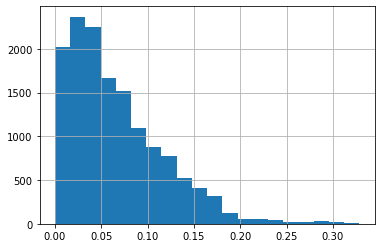

In [21]:
# Plot a histogram to reveal the Distribution of Item Visibility Column.
data.Item_Visibility.hist(bins=20)

### Detecting the Outliet
- An outlier is a data point that lies outside the overall pattern in distribution.
- A commonly used rule states that a data point is an outlier if it is more than 1.5*IQR above the third quartile or below the first quartile.
- Using this, one can remove the outliers and output the resulting data in fill_data variable.

In [22]:
# Calculate the first quantile for Item_visibility

Q1 = data.Item_Visibility.quantile(0.25)


# Calculate the third quantile for Item_visibility

Q3 = data.Item_Visibility.quantile(0.75)

# Calculate the IQR intraquartile range

IQR = Q3 -Q1


In [23]:
# Now that the IQR range is known, Remove the Outliers from the Data.

# Resulting data is stored in fill_data_variable.

fill_data = data.query('(@Q1 - 1.5 *@IQR) <= Item_Visibility <= (@Q3 + 1.5 *@IQR)')

In [24]:
# Display the data
fill_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [25]:
# Check the shape of the resulting datset without the outliers
fill_data.shape

(13943, 14)

In [26]:
# Shape of the origninal datset with the outliers
data.shape

(14204, 14)

In [27]:
# Assign fill_data dataset to data Dataframe
data = fill_data

# Print its shape
data.shape

(13943, 14)

In [28]:
# Identify the minimium and maximum value of Item Visibility Column
print(data.Item_Visibility.min())
print(data.Item_Visibility.max())

0.0
0.193772568


In [29]:
# Modify the Item_Visibility by converting the numerical columns into the categorical Low Visibility, Visibility, and High Visibility.

data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2], labels=["Low_Visibility","Visibility","High_Visibility"])

In [30]:
# Print the count of Item_Visibility_bins
data.Item_Visibility_bins.value_counts()

Low_Visibility     7363
Visibility         4283
High_Visibility    1418
Name: Item_Visibility_bins, dtype: int64

In [31]:
# # Replace the null values with Low Visibility
# data.Item_Visibility_bins = data.Item_Visibility_bins.replace(np.nan,"Low_Visibility",regex=True)

In [32]:
# Fill all the null values in "Item_Visibility_bins" Column with Low Visibility
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].fillna("Low_Visibility")

In [33]:
data.Item_Fat_Content.value_counts()

Low Fat    8352
Regular    4721
LF          506
reg         190
low fat     174
Name: Item_Fat_Content, dtype: int64

In [34]:
# We found typos and differences in representation in categories of Item_Fat_Content Variable

# Make Corrections

# Replace all other representation of Low Fat with Low Fat
data.Item_Fat_Content = data.Item_Fat_Content.replace(["low fat", "LF"], "Low Fat")

# Replace all other representation Regular with Regular
data.Item_Fat_Content = data.Item_Fat_Content.replace("reg", "Regular")

In [35]:
# Display the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23,Low_Visibility
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13,Low_Visibility
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23,Low_Visibility
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24,Low_Visibility
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35,Low_Visibility


In [36]:
# Code all categorical variable as numeric using 'Label Encoder' from sklearn processing module.

#Initialize the Label Encoder
le = LabelEncoder()

In [37]:
# Print the count of Item Fat Content Column
data.Item_Fat_Content.value_counts()

Low Fat    9032
Regular    4911
Name: Item_Fat_Content, dtype: int64

In [38]:
# Transform Item Fat Content

data.Item_Fat_Content = le.fit_transform(data.Item_Fat_Content)

In [39]:
# Print the count of Item Visibility Bins Column
data.Item_Visibility_bins.value_counts()

Low_Visibility     8242
Visibility         4283
High_Visibility    1418
Name: Item_Visibility_bins, dtype: int64

In [40]:
# Transform Item Visibility bins

data.Item_Visibility_bins = le.fit_transform(data.Item_Visibility_bins)

In [41]:
# Print the count of Oulet Size Column
data.Outlet_Size.value_counts()

Medium    8544
Small     3846
High      1553
Name: Outlet_Size, dtype: int64

In [42]:
# Transform Outlet Size

data.Outlet_Size = le.fit_transform(data.Outlet_Size)

In [43]:
# Print the count of Outlet Location Type Column
data.Outlet_Location_Type.value_counts()

Tier 3    5456
Tier 2    4641
Tier 1    3846
Name: Outlet_Location_Type, dtype: int64

In [44]:
# Transform Outlet Location type

data.Outlet_Location_Type = le.fit_transform(data.Outlet_Location_Type)

In [45]:
#Print the unique values of outlet type
data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [46]:
#Create the dummies for outlet type
dummy = pd.get_dummies(data.Outlet_Type)
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [47]:
# Print the unique value of Item Identifier Column

data.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [48]:
# Print the count of Item Type Column.
data.Item_Type.value_counts()

Fruits and Vegetables    1973
Snack Foods              1948
Household                1528
Frozen Foods             1393
Dairy                    1116
Baking Goods             1064
Canned                   1061
Health and Hygiene        848
Meat                      726
Soft Drinks               717
Breads                    408
Hard Drinks               356
Others                    276
Starchy Foods             262
Breakfast                 181
Seafood                    86
Name: Item_Type, dtype: int64

In [49]:
# As there are multiple values of food, nonconsumeable items, and drinks with different numbers, Lets combine the item type.

# As multiple categories are present in the Item Identifier, reduce this by mapping
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x:x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({"FD" : "Food",
                                                            "NC":"Non-Consumable",
                                                            "DR":"Drinks"})

In [50]:
# Only three categories are present in an Item_Type_Combined Column
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [51]:
data.shape

(13943, 16)

In [52]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Outlet_Age                     int64
Item_Visibility_bins           int32
Item_Type_Combined            object
dtype: object

In [53]:
# Perform One-hot encoding for all columns as the model works on numerical columns not on categorical columns
data = pd.get_dummies(data,columns = ["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Type_Combined"])

In [54]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [55]:
# Drop the columns which have been converted to different types
data.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)

In [56]:
# Divide the data created earlier into train and test datasets
train  = data.loc[data["source"] == "train"]
test  = data.loc[data["source"] == "test"]

# Drop Unnecessay Columns
train.drop("source",axis=1,inplace=True)
test.drop(["Item_Outlet_Sales","source"],axis=1,inplace=True)


In [57]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Outlet_Age',
       'Item_Visibility_bins', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-Consumable'],
      dtype='object')

In [58]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Age', 'Item_Visibility_bins',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-Consumable'],
      dtype='object')

In [59]:
# Export the modified version of the files 
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [60]:
# Read the both modified datsets
train2 = pd.read_csv(r"train_modified.csv")
test2 = pd.read_csv(r"test_modified.csv")

In [61]:
# Print the info aboot train2 dataset
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8375 entries, 0 to 8374
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    8375 non-null   object 
 1   Item_Weight                        8375 non-null   float64
 2   Item_Visibility                    8375 non-null   float64
 3   Item_MRP                           8375 non-null   float64
 4   Outlet_Identifier                  8375 non-null   object 
 5   Item_Outlet_Sales                  8375 non-null   float64
 6   Outlet_Age                         8375 non-null   int64  
 7   Item_Visibility_bins               8375 non-null   int64  
 8   Item_Fat_Content_0                 8375 non-null   int64  
 9   Item_Fat_Content_1                 8375 non-null   int64  
 10  Outlet_Location_Type_0             8375 non-null   int64  
 11  Outlet_Location_Type_1             8375 non-null   int64

In [62]:
# View of Irrelevent Column
train2[["Outlet_Identifier","Item_Identifier"]].head()

,Outlet_Identifier,Item_Identifier
0,OUT049,FDA15
1,OUT018,DRC01
2,OUT049,FDN15
3,OUT010,FDX07
4,OUT013,NCD19


In [63]:
# Drop the irrelevent variable from train2 dataset and Created the Independent variable X_train and Dependent variable y_train
X_train = train2.drop(["Outlet_Identifier","Item_Identifier","Item_Outlet_Sales"],axis=1)
y_train = train2.Item_Outlet_Sales

In [64]:
# Drop the irrelevent variable from test2 dataset
X_test = test2.drop(["Outlet_Identifier","Item_Identifier"],axis=1)

In [65]:
# View of X_test Data
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,23,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,15,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,24,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,15,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,37,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


In [66]:
# View of X_train Data
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,23,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,13,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,23,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,24,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,35,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [67]:
# View of y_train data
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [68]:
# import liabraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [69]:
# Create a train and test split
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X_train,y_train, test_size=0.3,random_state = 42)

In [70]:
# Fit Linear Regression to the trainning dataset
LinR = LinearRegression()
LinR.fit(xtrain,ytrain)


LinearRegression()

In [71]:
# Using X_train and y_train for linear Regression, Find the coefficient and intercept of the line
print(LinR.coef_)
LinR.intercept_

[-1.92692654e+00 -3.32746294e+02  1.58826212e+01 -3.19549640e+01
 -1.41755050e+01 -1.45901761e+00  1.45901761e+00  1.88878689e+02
  4.79867957e+01 -2.36865485e+02  5.39642616e+02 -3.11411308e+02
 -2.28231308e+02 -1.63576909e+03 -1.25872012e+02 -3.48803423e+02
  2.11044453e+03  8.83932211e+00  3.46875666e+01 -4.35268887e+01]


1083.288003188069

In [72]:
predictions = LinR.predict(xtest)
predictions

array([2070.25767998, 3705.69772   , 2962.46996681, ..., 3533.89305865,
       3477.22169198, 1241.7263815 ])

In [73]:
print(predictions)

[2070.25767998 3705.69772    2962.46996681 ... 3533.89305865 3477.22169198
 1241.7263815 ]


In [74]:
print(ytest)

4727    2105.2596
8161    4354.9978
2333    3803.0496
4204    1755.7146
5404    3961.5100
          ...    
252      193.0820
4512     191.7504
5552    5193.2400
1789    1496.0526
7572    2220.4430
Name: Item_Outlet_Sales, Length: 2513, dtype: float64


In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(ytest,predictions)

0.5642247934683805

In [77]:
# Find the RMSE for the model
print(sqrt(mean_squared_error(ytest,predictions)))

1126.407106641178


__Good RMSE for this problem 1130, RMSE of this model is low it can improve by applying other ML ALgo such as Decesion Tree,  Random Forest, XG Boost, will cover later__

In [78]:
#Predict the sales of each product at a particular store in test data

# Predict the Column Item_Outlet_Sales of test dataset
y_sales_pred = LinR.predict(X_test)
y_sales_pred

array([1789.6058103 , 1594.72524585, 1837.40378278, ..., 1823.78563072,
       3615.91286916, 1276.90636874])

In [79]:
test_predictions = pd.DataFrame({"Item_Identifier": test2["Item_Identifier"],
                                "Outlet_Identifier" :test2["Outlet_Identifier"],
                                "Item_Outlet_Sales":y_sales_pred
                                },columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])

In [80]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1789.605810
1,FDW14,OUT017,1594.725246
2,NCN55,OUT010,1837.403783
3,FDQ58,OUT017,2676.850457
4,FDY38,OUT027,5126.989630
...,...,...,...
5563,FDB58,OUT046,2360.895690
5564,FDD47,OUT018,2431.178290
5565,NCO17,OUT045,1823.785631
5566,FDJ26,OUT017,3615.912869


# ___Summary Table___
### Step-1: Import liabraries and load dataset
### Step-1: Made a hypothesis about the data without looking at it
### Step-2: Moved on to data exploration and found some nuances in the data which required remediation
### Step-3: Performed data cleaning and feature engineering and imputed the missing values and solve other irregularities 
### Step-4: Made new feature and also made the data-model friendly using one-hot encoding
### Step-5: Built a regression model